In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pandas as pd

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('drifts.csv')

In [3]:
df

,model,run,OHC (J yr-1),barystatic OHC (J yr-1),thermal OHC (J yr-1),hfds (J yr-1),netTOA (J yr-1),wfo (kg yr-1),masso (kg yr-1),soga (g/kg yr-1),masso (g/kg yr-1),zosbary (m y-1),zostoga (m yr-1),masso (m yr-1)
0,ACCESS1-0,r1i1p1,1.880000e+21,1.470000e+20,1.730000e+21,2.290000e+21,7.820000e+21,-1.307750e+14,1.323700e+14,-0.000004,-3.440000e-06,3.337500e-04,0.000178,3.539480e-04
1,ACCESS1-3,r1i1p1,-2.420000e+21,-6.240000e+20,-1.800000e+21,-1.270000e+21,1.650000e+21,-8.065390e+14,-5.630000e+14,0.000015,1.460000e-05,-1.504552e-03,-0.000177,-1.505630e-03
2,BCC-CSM1-1,r1i1p1,9.500000e+19,1.900000e+19,7.610000e+19,1.810000e+21,-1.240000e+22,NaN,1.707840e+13,-0.000059,-4.350000e-07,3.290000e-05,0.000016,3.250000e-05
3,CMCC-CESM,r1i1p1,-2.200000e+20,0.000000e+00,-2.200000e+20,2.210000e+21,2.460000e+22,-8.718780e+11,0.000000e+00,-0.000003,0.000000e+00,-1.000000e-09,-0.000029,0.000000e+00
4,CMCC-CMS,r1i1p1,2.660000e+20,2.889130e+15,2.660000e+20,3.470000e+21,1.270000e+22,-9.149130e+11,2.607595e+09,-0.000004,-6.770000e-11,5.430000e-10,0.000028,5.140000e-09
5,GFDL-ESM2G,r1i1p1,-2.000000e+20,-1.620000e+16,-2.000000e+20,-4.180000e+20,-1.780000e+21,-2.957520e+14,-1.330580e+12,0.000002,3.350000e-08,NaN,NaN,NaN
6,MIROC-ESM,r1i1p1,8.920000e+21,-4.150000e+20,9.330000e+21,-6.600000e+23,-4.700000e+22,2.663070e+15,-3.743720e+14,0.000010,9.520000e-06,-1.010853e-03,0.000896,-9.932230e-04


In [9]:
np.isnan(df.iloc[2]['wfo (kg yr-1)'])

True

In [10]:
def abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""

    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, linestyle='--', c='0.5')
    
    
def format_axis_label(orig_label):
    """Put LaTeX math into axis labels"""
    
    return orig_label.replace('(', '($').replace(')', '$)').replace('yr-1', '\; yr^{-1}')

In [103]:
zoom_limits = {'thermal energy conservation': [-5e21, 5e21],
               'mass conservation': [-1e13, 1e13],
               'salt conservation': [-2e-5, 2e-5]}

markers = ['o', '<', '^', '>', 'v', 's', 'p', '*', 'D', '+', 'x']

def plot_aesthetics(ax, yvar, xvar):
    """Set the plot aesthetics"""
    
    abline(ax, 1, 0)
    ax.axhline(y=0, color='0.5')
    ax.axvline(x=0, color='0.5')
    #ax.yaxis.major.formatter._useMathText = True
    #ax.xaxis.major.formatter._useMathText = True

    ylabel = format_axis_label(yvar)
    ax.set_ylabel(ylabel)
    xlabel = format_axis_label(xvar)
    ax.set_xlabel(xlabel)
    plt.sca(ax)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


def plot_comparison(df, title, xvar, yvar):
    """Plot comparison for given x and y variables."""

    assert title in zoom_limits.keys()
    
    fig = plt.figure(figsize=[14, 5])
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    colormap = cm.gist_rainbow
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df['model']))]

    for dotnum, color in enumerate(colorlist):
        x = df[xvar][dotnum]
        y = df[yvar][dotnum]
        marker = markers[dotnum]
        label = df['model'][dotnum] + ' (' + df['run'][dotnum] + ')'
        ax1.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker, c=color, edgecolors='black')
        ax2.scatter(x, y, label=label, s=130, linewidth=1.2, marker=marker, c=color, edgecolors='black')
        ax2.legend()

    plot_aesthetics(ax1, yvar, xvar)
    plot_aesthetics(ax2, yvar, xvar)
        
    ax1.set_title('all models')
    ax2.set_title('zoomed in')
    plt.suptitle(title)

    # Put a legend to the right of the current axis
    if title == 'salt conservation':
        ax1.set_ylim([-1e-4, 1e-4])
        ax1.set_xlim([-1e-4, 1e-4])

    ax2.set_ylim(zoom_limits[title])
    ax2.set_xlim(zoom_limits[title])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

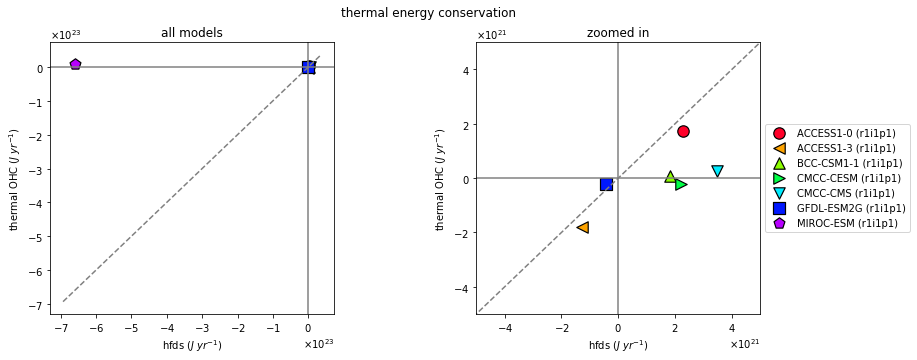

In [104]:
plot_comparison(df, 'thermal energy conservation', 'hfds (J yr-1)', 'thermal OHC (J yr-1)')

Below the 1:1 line indicates that the ocean model is losing heat.

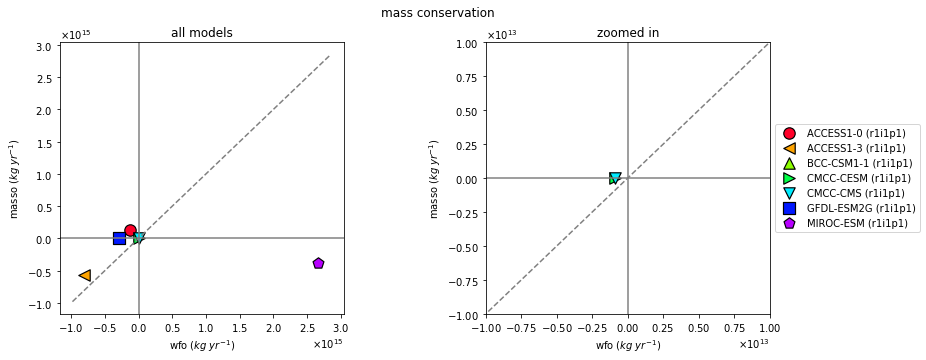

In [105]:
plot_comparison(df, 'mass conservation', 'wfo (kg yr-1)', 'masso (kg yr-1)')

Below the 1:1 line indicates that the ocean model is losing mass.

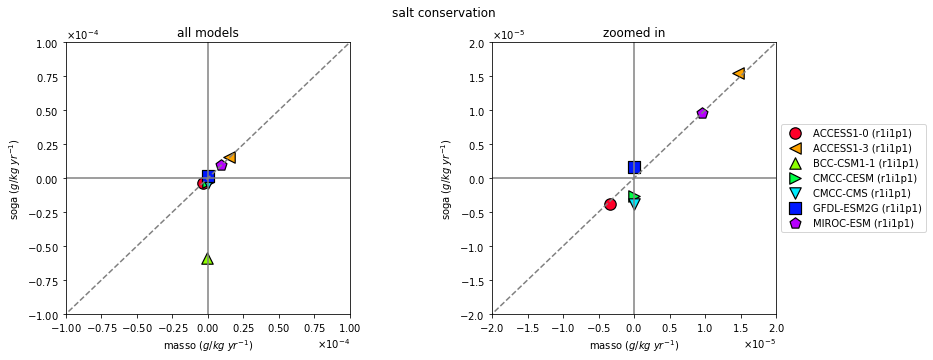

In [106]:
plot_comparison(df, 'salt conservation', 'masso (g/kg yr-1)', 'soga (g/kg yr-1)')